# Análise do Dataset Iris

Este notebook realiza análises e visualizações utilizando o dataset **Iris**.
Nosso roteiro:
1. **Compreensão Inicial dos Dados**
   - Carregar e visualizar o dataset
   - Resumo estatístico

2. **Análise Univariada**
   - Distribuições das variáveis numéricas
   - Boxplots

3. **Análise Bivariada**
   - Gráficos de dispersão (Scatter plots)
   - Pairplots

4. **Análise Multivariada**
   - Gráficos tridimensionais
   - Heatmap de correlação

5. **Conclusões e Insights**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Compreensão Inicial dos Dados


## Carregar o Dataset e Visualizar os Dados

In [2]:
# Carregar o dataset Iris do seaborn
iris = sns.load_dataset("iris")

# Exibir as 5 primeiras linhas do dataset
print("Primeiras 5 linhas do dataset:")
print(iris.head())

Primeiras 5 linhas do dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

**Consultando dados nulos ou Missing Values no Dataframe**


In [8]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Tipo do Objeto carregado

In [33]:
type(iris)

pandas.core.frame.DataFrame

## Estatísticas Descritivas

In [34]:
# Exibir estatísticas descritivas
print("\nEstatísticas descritivas:")
print(iris.describe())


Estatísticas descritivas:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Lista das espécies únicas no dataset

In [35]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Filtrar Dados: Espécie 'setosa'

In [36]:
# Filtrar dados: Selecionar apenas as amostras da espécie 'setosa'
setosa = iris[iris['species'] == 'setosa']
print("\nAmostras da espécie 'setosa':")
print(setosa.head())


Amostras da espécie 'setosa':
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# 2. Análise Univariada

## Distribuições das variáveis numéricas

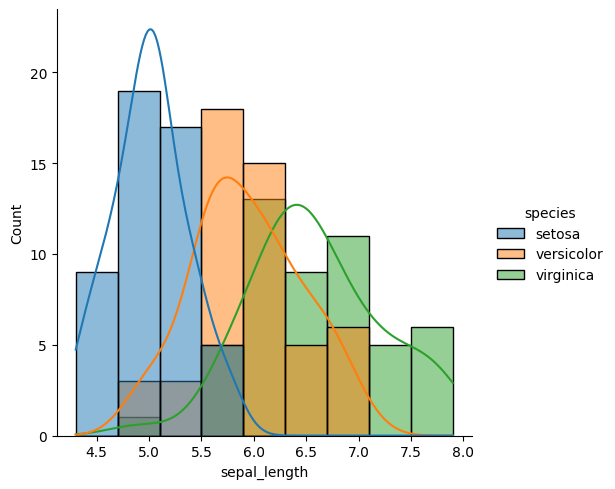

In [15]:
sns.displot(data=iris, x='sepal_length', kde=True, hue="species")


### Gráfico de densidade (sns.kdeplot) para todas espécies

<Axes: xlabel='sepal_length', ylabel='Density'>

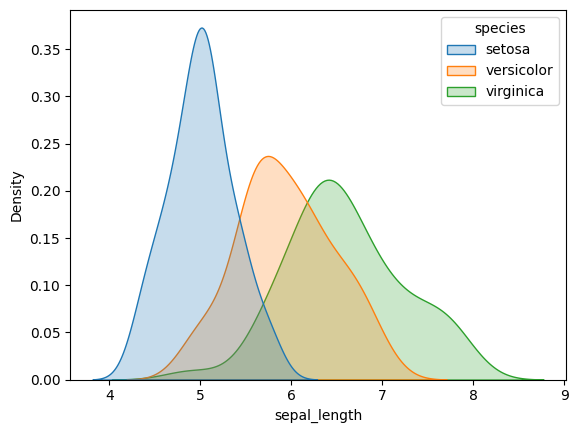

In [37]:
sns.kdeplot(data=iris, x='sepal_length', hue='species', fill=True)


## Conclusão do Gráfico de densidade (sns.kdeplot)

### Para o comprimento da sépala (`sepal_length`):
- **Iris setosa**: Geralmente apresenta valores menores e um padrão bem distinto, com pouca sobreposição em relação às outras espécies.
- **Iris versicolor** e **Iris virginica**: Podem ter distribuições mais próximas, resultando em uma leve sobreposição das curvas.

### Para o comprimento da pétala (`petal_length`):
- **Iris setosa**: A curva geralmente se destaca, pois as pétalas dessa espécie são significativamente menores.
- **Iris versicolor** e **Iris virginica**: Diferem em média, mas há uma maior sobreposição em comparação ao comprimento das sépalas.

### Histograma

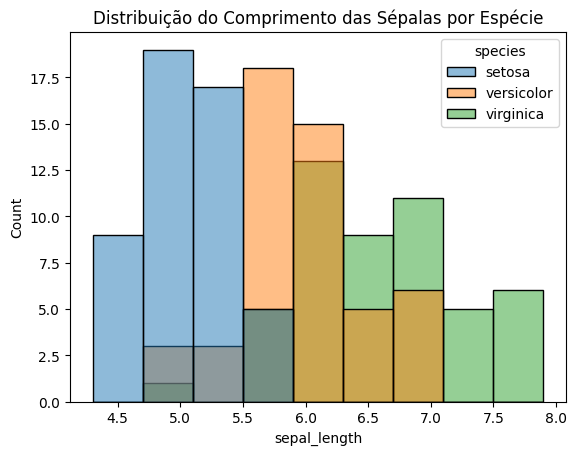

In [50]:
sns.histplot(data=iris, x='sepal_length', hue='species', fill=True, common_norm=False)

# sns.histplot(data=iris, x="sepal_length", kde=True, bins=20, color="blue")
plt.title('Distribuição do Comprimento das Sépalas por Espécie')
plt.show()

### Boxplot: Comprimento das Pétalas por Espécie

<Axes: xlabel='species', ylabel='petal_length'>

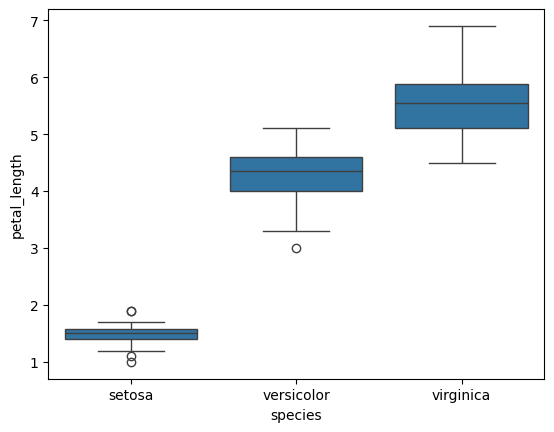

In [39]:
sns.boxplot(data=iris, x='species', y='petal_length')


## Conclusão do gráfico Boxplot: Comprimento das Pétalas por Espécie

- **Iris setosa**: Apresenta uma distribuição mais compacta e com valores menores para o comprimento das pétalas. O boxplot mostra que a maioria das amostras estão concentradas em torno de valores baixos, com pouca variabilidade.

- **Iris versicolor**: Tem uma faixa maior de comprimento das pétalas, com o boxplot indicando uma distribuição mais espalhada em comparação com a Iris setosa. A mediana está mais alta e o intervalo interquartil (IQR) é maior, indicando maior variabilidade.

- **Iris virginica**: Similar à Iris versicolor, mas com uma mediana ainda mais alta, sugerindo que o comprimento das pétalas dessa espécie é, em média, maior. O IQR também é considerável, mostrando uma variabilidade notável.

- **Comparações entre as espécies**: O boxplot revela que **Iris setosa** tem os menores comprimentos de pétalas, enquanto **Iris versicolor** e **Iris virginica** têm comprimentos de pétalas maiores, com uma ligeira sobreposição entre elas, mas com **Iris virginica** apresentando valores mais altos em geral.

O gráfico ajuda a visualizar claramente a diferença entre as espécies e a distribuição dos dados em termos de variabilidade e tendência central.

## Agrupar por espécie e calcular a média de cada coluna numérica

In [40]:

media_por_especie = iris.groupby('species').mean()
print("\nMédias por espécie:")
print(media_por_especie)


Médias por espécie:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


# 3. Análise Bivariada

## Gráfico de Dispersão: Sepal Length vs Sepal Width

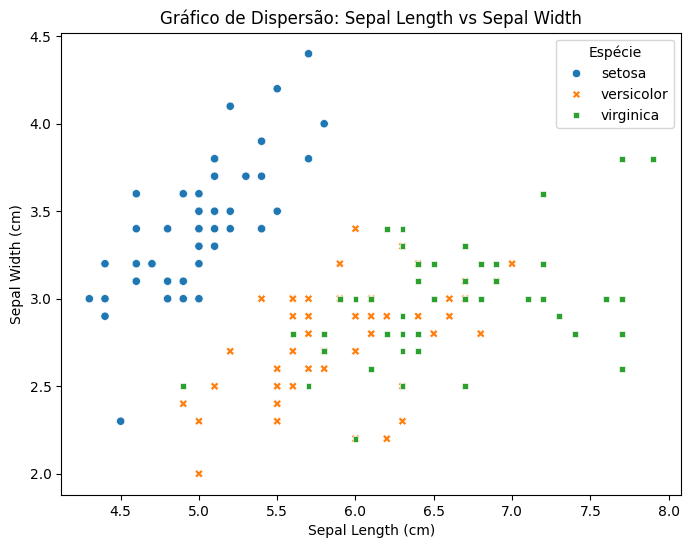

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', style='species')
plt.title('Gráfico de Dispersão: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Espécie')
plt.show()

## Conclusão do Gráfico de Dispersão: Sepal Length vs Sepal Width

- **Distribuição das espécies**: O gráfico de dispersão revela que as espécies de flores apresentam padrões distintos, com **Iris setosa** sendo claramente separada das outras duas espécies. As amostras de **Iris setosa** têm uma combinação de comprimento e largura da sépala menores, formando um grupo compacto no gráfico.

- **Iris versicolor e Iris virginica**: As duas espécies apresentam maior sobreposição entre si. Embora ambas tenham valores de comprimento e largura das sépalas maiores que **Iris setosa**, a separação entre elas não é tão pronunciada. **Iris virginica** tende a ter valores ligeiramente maiores para o comprimento da sépala, mas a sobreposição entre **Iris versicolor** e **Iris virginica** pode dificultar a distinção visual clara apenas por essas duas características.

- **Correlação**: Pode-se observar que, para a maioria das espécies, existe uma correlação positiva entre o comprimento e a largura da sépala, ou seja, à medida que o comprimento da sépala aumenta, a largura também tende a aumentar. No entanto, essa relação não é perfeitamente linear.

- **Outliers**: É possível que existam alguns pontos que se destacam como outliers, especialmente para as espécies **Iris versicolor** e **Iris virginica**, indicando possíveis anomalias ou variações fora do padrão geral.

Este gráfico de dispersão ajuda a identificar padrões, sobreposições e possíveis tendências nas características das sépalas das diferentes espécies do dataset Iris.

## Pairplot: Todas as combinações possíveis em um único gráfico

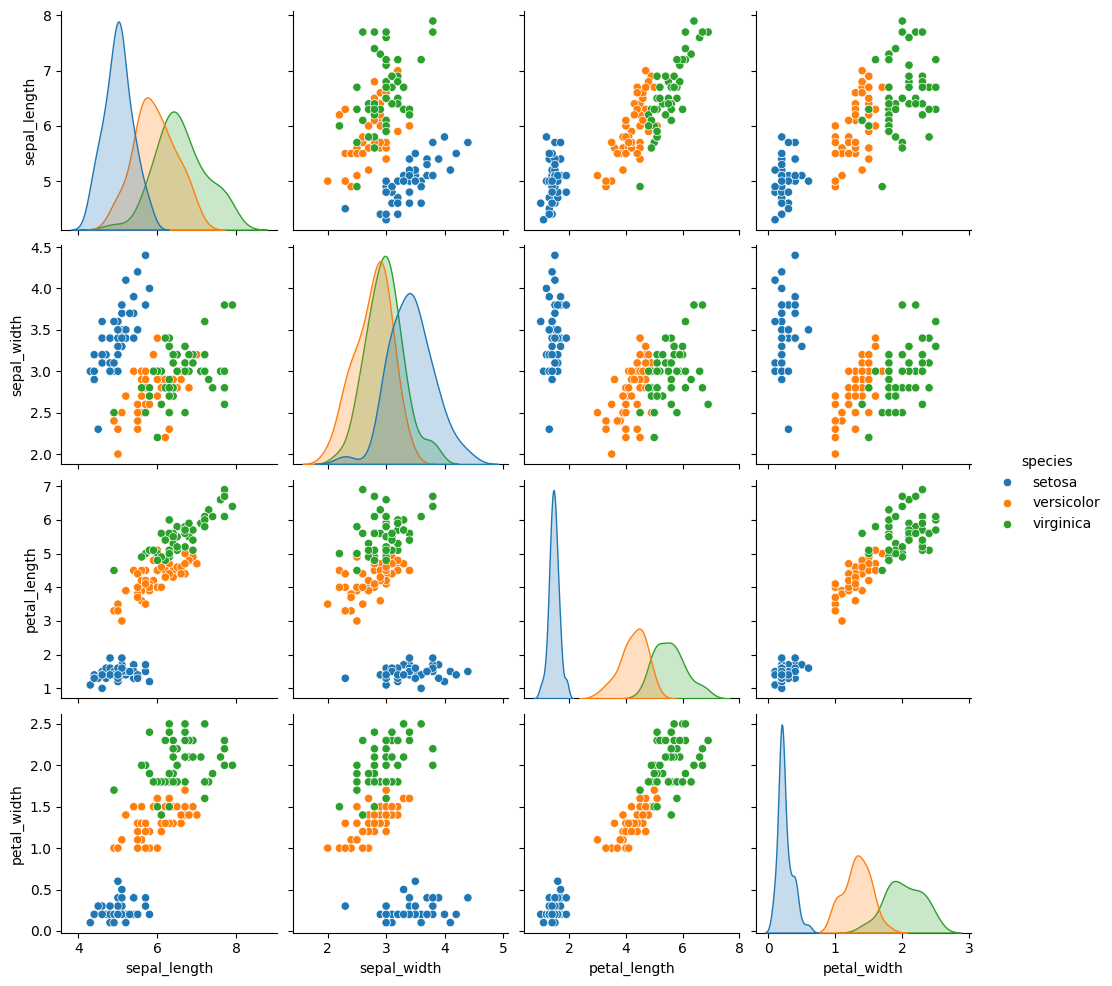

In [42]:
sns.pairplot(iris, hue='species', diag_kind='kde')


## Conclusões do Pairplot: Todas as Combinações Possíveis

- **Separação das espécies**:
  - **Iris setosa**: Apresenta uma separação bem definida em relação às outras espécies. Suas características (como comprimento e largura das sépalas e pétalas) formam grupos compactos e visivelmente distintos, especialmente quando comparada com **Iris versicolor** e **Iris virginica**.
  - **Iris versicolor e Iris virginica**: Embora haja alguma sobreposição entre essas duas espécies, é possível notar que **Iris virginica** tende a apresentar valores maiores para o comprimento e largura das pétalas, enquanto **Iris versicolor** tem valores um pouco menores. Porém, a sobreposição pode dificultar a distinção visual clara entre elas em algumas combinações de variáveis.

- **Relações entre as variáveis**:
  - Existe uma correlação positiva entre as variáveis em várias combinações, como entre o **comprimento da sépala** e o **comprimento da pétala**, sugerindo que, em geral, um aumento no comprimento da sépala tende a acompanhar um aumento no comprimento da pétala.
  - As variáveis de **largura da sépala** e **largura da pétala** mostram uma correlação mais fraca com outras variáveis, com uma distribuição mais dispersa e com maior sobreposição entre as espécies.

- **Distribuição das características**:
  - Nos histogramas da diagonal do pairplot, observa-se que **Iris setosa** tem distribuições bem concentradas para o comprimento e a largura das pétalas, enquanto **Iris versicolor** e **Iris virginica** apresentam uma maior variabilidade nessas características.

- **Outliers**:
  - Não há muitos outliers evidentes no pairplot, o que indica que os dados são relativamente consistentes dentro de cada espécie. No entanto, em algumas combinações de variáveis, pequenas variações podem ser observadas.

- **Visualização das relações**:
  - O pairplot é útil para visualizar como as diferentes variáveis se correlacionam entre si e como as espécies de flores se separam ou se sobrepõem em diferentes combinações dessas variáveis.

# 4. Análise Multivariada

## Gráficos tridimensionais:


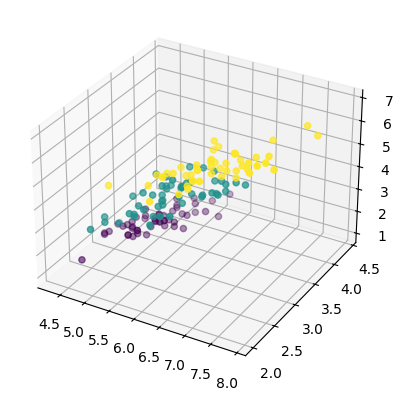

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris['sepal_length'], iris['sepal_width'], iris['petal_length'], c=iris['species'].astype('category').cat.codes)
plt.show()

## Conclusões do Gráfico 3D: Sepal Length vs Sepal Width vs Petal Length

- **Visualização das Espécies**:
  - O gráfico 3D permite visualizar como as espécies de **Iris** se distribuem em um espaço tridimensional, considerando as variáveis **comprimento da sépala (sepal_length)**, **largura da sépala (sepal_width)** e **comprimento da pétala (petal_length)**.
  - As cores no gráfico representam as diferentes espécies, com cada espécie (Setosa, Versicolor, Virginica) sendo identificada por uma cor distinta. Isso ajuda a visualizar a separação entre as espécies em relação a essas características.

- **Separação entre as Espécies**:
  - **Iris setosa** é claramente separada das outras duas espécies no gráfico 3D, com uma distribuição distinta nas três dimensões. Essa espécie forma um grupo mais compacto e visível.
  - **Iris versicolor** e **Iris virginica** apresentam maior sobreposição, embora seja possível observar que **Iris virginica** tende a ter valores maiores para o **comprimento da pétala** e **largura da sépala**. As duas espécies estão mais próximas no gráfico, dificultando a separação visual completa.

- **Relações entre as Variáveis**:
  - A relação entre o **comprimento da sépala** e o **comprimento da pétala** é observada no gráfico, com uma tendência de **Iris virginica** e **Iris versicolor** apresentarem valores maiores em ambas as variáveis. No entanto, a **largura da sépala** não segue a mesma tendência de variação, com maior dispersão observada nesse eixo.
  
- **Utilização do Gráfico 3D**:
  - O gráfico 3D oferece uma visão mais rica das relações espaciais entre as variáveis, mas pode ser difícil de interpretar em termos de sobreposições quando há muitas espécies ou dados muito próximos.
  - Embora o gráfico 3D facilite a visualização de múltiplas variáveis simultaneamente, a análise pode ser mais complexa devido à perspectiva visual e ao agrupamento das espécies.

- **Possíveis Melhorias**:
  - O gráfico poderia s

## Heatmap de correlação:


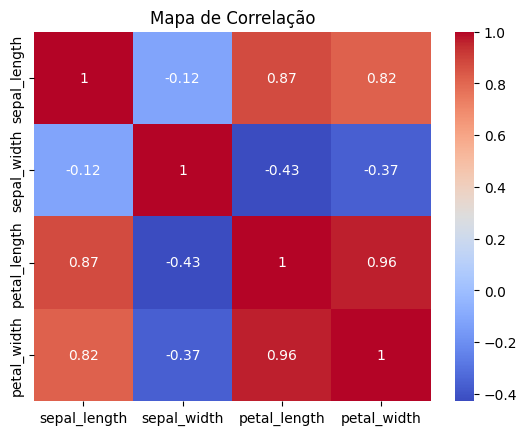

In [44]:
corr_matrix = iris.iloc[:, :-1].corr()  # Ignorar a coluna de espécies
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()

### **Interpretação do heatmap de correlação:

- **Relações fortes:**
  - O comprimento da pétala (`petal_length`) e a largura da pétala (`petal_width`) geralmente têm uma correlação positiva alta porque estão fortemente relacionadas.
  
- **Relações fracas ou nulas:**
  - A largura da sépala (`sepal_width`) pode ter uma correlação menor com as outras variáveis, indicando independência relativa.